# A.  Basics on Python ssssd

Python is an object oriented programming language very popular amongst data analytics and machine learning apprentices. In this section, we show how to run a simple code under python. 

All implementations need to start with basic imports of necessary modules (classes of objects). In the following example, we import a very useful module, Numerical Python (Numpy), which provides for a variety of functions and operators (methods). Note that numpy syntax is often close to the one you are used to in Matlab. You can find a very useful user quide in the following: https://docs.scipy.org/doc/numpy/index.html . We also import the Matplotlib library which allows to create plots. 

Let us now start with a basic example. 

## 1. Basic imports and plots

In [0]:
import scipy.stats as sc_stats
import numpy as np # choose whatever name you wish to give to numpy, but keep it along your code
import matplotlib.pyplot as plt # you need not import the whole library, only useful modules


Next, we create and plot a period of a sinusoid at frequency $f = 10$ Hz using the functions provided by the environement numpy, and the plot method of matlplotlib.plot

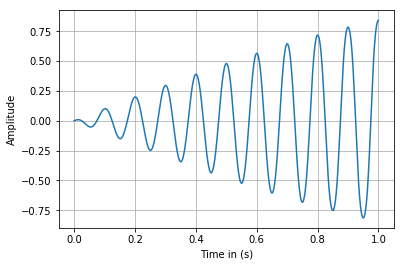

In [0]:
Freq = 10 # frequency in Hz
time = np.linspace(0,1,1000) # create a time array 
signal_interest = np.sin(time*np.cos(2*np.pi*Freq*time)) # compute the sinusoid as a function of this time array

plt.plot(time,signal_interest) # plot the result
plt.xlabel('Time in (s)') # xlabel
plt.ylabel('Amplitude') # ylabel
plt.grid(True) # grid on 

Question: plot the bit probability of error $P_e$ as a function of $\dfrac{E_b}{N_0}$ for an uncoded transmission over additive white Gaussian noise (AWGN) channels! To this end, use the formula $$ P_e = Q \left(\sqrt{2\dfrac{E_b}{N_0}} \right)$$

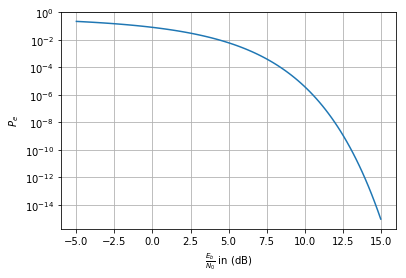

In [46]:
ebno_db = np.linspace(-5,15,100) # snr in dB
ebno = np.power(10*np.ones(len(ebno_db)),ebno_db/10) 
pe = sc_stats.norm.sf(np.sqrt(2*ebno))

plt.plot(ebno_db,pe) # plot the result
plt.xlabel('$\\frac{E_b}{N_0}$ in (dB)') # xlabel
plt.ylabel('$P_e$') # ylabel
plt.yscale('log')
plt.grid(True) # grid on 

## 2. Arrays, loops and indentation

In python, and more specifically numpy, a vector is an array while a matrix is an array of arrays. Almost all operations you know in Matlab have their equivalent in numpy. Loops have a specific syntax, and indentation is crucial in Python, especially for loops. A simple example here allows to generate a matrix with specific entries. 

In [0]:
Nbr_rows = 5 # number of rows
Nbr_cols = 7 # number of columns

M = np.zeros((Nbr_rows, Nbr_cols), dtype = int) # initialize the matrix with integer valued zeros

for ind_rows in range(0,Nbr_rows): # first loop on the row indices
    for ind_cols in range(0,Nbr_cols): # seconf loop on the row indices
        M[ind_rows, ind_cols] = ind_rows + ind_cols  # instantiation of the matrix
    
M # print the result 

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 1,  2,  3,  4,  5,  6,  7],
       [ 2,  3,  4,  5,  6,  7,  8],
       [ 3,  4,  5,  6,  7,  8,  9],
       [ 4,  5,  6,  7,  8,  9, 10]])

 - $\textbf{Warning}$: do not forget the ":" at the end of the loop definition !  
 - The same syntax holds for while, if, ... 
 - Operators "and" and "or" are well defined in python 
 - As in Matlab, pre-allocation is crucial in python    
 

## 3. Definition of functions

To define a function, you need to use the method def(). A simple example is given below. 

In [0]:
# Define the function
def dB_to_lin(x):
    return 10.0**(x/10.0)

# Test the function
x_db = np.array([1,2,5,8,10]) # define an array of SNRs in dB
dB_to_lin(x_db) # compute the corresponding linear scale SNRs

array([ 1.25892541,  1.58489319,  3.16227766,  6.30957344, 10.        ])

# B. A simple communication chain

Simulate and plot the BER of an uncoded BPSK transmission over an AWGN as a function of $\dfrac{E_b}{N_0}$ and compare it with the theoretic probability of error obtained herebefore. To this end: 
 - Import useful modules: numpy, matplotlib.plot, scipy.special.norm, ... 
 - Define the different parameters of your code 
 - Define functions for: 
   - BPSK modulation
   - Threshold detection of a BPSK
   - Counting the number of errors
   - Computing the theoretic BER 
 - Simulate the comm chain for each $\dfrac{E_b}{N_0}$  
 - Plot the BER and the probability of error in a logscale 
 - Use long blocklengths for a good averaging

Start EbN0 0/10 -15.0
Start EbN0 1/10 -12.222222222222221
Start EbN0 2/10 -9.444444444444445
Start EbN0 3/10 -6.666666666666668
Start EbN0 4/10 -3.8888888888888893
Start EbN0 5/10 -1.1111111111111107
Start EbN0 6/10 1.6666666666666643
Start EbN0 7/10 4.444444444444443
Start EbN0 8/10 7.222222222222221
Start EbN0 9/10 10.0


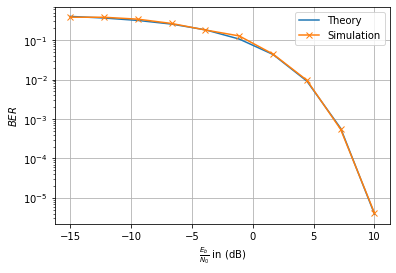

In [1]:
# -*- coding: utf-8 -*-

from src.communications import *
from src.utils import ber_performance
import matplotlib.pyplot as plt

import scipy.stats as sc_stats
import numpy as np

def channel(modulation, b, EbN0dB):
    transmitter = Transmitter()
    channel = AWGNChannel()    
    receiver = Receiver()
    
    c = transmitter.transmitt(b)
    d = channel.process(c, EbN0dB)
    b_r = receiver.receive(d)
    
    return b_r, c, d

EbN0dBs = np.linspace(-15, 10, 10)
BER = ber_performance('BPSK', EbN0dBs, channel, 1000, 100)

ebno = np.power(10*np.ones(len(EbN0dBs)), EbN0dBs/10) 
pe = sc_stats.norm.sf(np.sqrt(2*ebno))

plt.plot(EbN0dBs, pe) # plot the result
plt.plot(EbN0dBs, BER, '-x') # plot the result
plt.legend(['Theory', 'Simulation'])
plt.xlabel('$\\frac{E_b}{N_0}$ in (dB)') # xlabel
plt.ylabel('$BER$') # ylabel
plt.yscale('log')
plt.grid(True) # grid on 